In [30]:
import numpy as np

In [5]:
x = np.arange(15, dtype=np.int64)

In [6]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [12]:
x = x.reshape(3,5)

In [13]:
x[:]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [16]:
x[1:,::2] ## step 가지고 가지고 오는 것 

array([[ 5,  7,  9],
       [10, 12, 14]])

In [17]:
x[1:,::2] = 99

In [18]:
x

array([[ 0,  1,  2,  3,  4],
       [99,  6, 99,  8, 99],
       [99, 11, 99, 13, 99]])

In [20]:
x.max(axis=0) 

array([99, 11, 99, 13, 99])

In [21]:
x.max(axis=1) 

array([ 4, 99, 99])

In [22]:
rng = np.random.default_rng() 정규분포
samples = rng.normal(size=2500) ##

In [23]:
samples

array([-0.69700332, -1.42737065,  0.98682161, ..., -0.57479195,
        1.75400089,  0.50100067])

## Chap 2  파이썬은 느린데 넘파이는 빠르다

In [24]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [25]:
b = np.arange(5,10)
b

array([5, 6, 7, 8, 9])

In [28]:
%%timeit
c = []
for i in range(len(a)):
    c.append(a[i]*b[i])
c

904 ns ± 14.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [29]:
%%timeit ## 코드도 간결하고 시간도 빠르다는 것 
c= a*b
c

261 ns ± 0.96 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Chap 8. 넘파이 배열 축 추가하기

In [33]:
a = np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [34]:
a2 = a[np.newaxis,:]

In [35]:
a2

array([[1, 2, 3, 4, 5, 6]])

In [36]:
a3 = a[:,np.newaxis]
a3

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [37]:
a4 = np.expand_dims(a,axis=1)
a4

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [38]:
a5 = np.expand_dims(a,axis=0)
a5

array([[1, 2, 3, 4, 5, 6]])

## Chap9. 인덱싱과 슬라이싱

In [39]:
a = np.arange(1,13)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [40]:
a[a>=5]

array([ 5,  6,  7,  8,  9, 10, 11, 12])

In [43]:
a[a%2==0]

array([ 2,  4,  6,  8, 10, 12])

In [46]:
b = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
b_nonzero = np.nonzero(b<5)  # -> 해당되는 인덱스 값을 반환하고 있는 것 

In [47]:
b_nonzero

(array([0, 0, 0, 0]), array([0, 1, 2, 3]))

In [49]:
list_of_coordinate = list(zip(b_nonzero[0],b_nonzero[1]))
for coord in list_of_coordinate:
    print(coord) ## nonzero에 포함되는 곳 

(0, 0)
(0, 1)
(0, 2)
(0, 3)


In [52]:
b[b_nonzero]

array([1, 2, 3, 4])

## Chap 10. vstack, hstack, hsplit  데이터 병합, 얕은 복사와 깊은 복사

In [53]:
a = np.arange(1,11)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [54]:
arr1 = a[3:8]

In [56]:
a1 = np.array([[1,1],
             [2,2]])

a2 = np.array([[3,3],
             [4,4]])

In [57]:
np.vstack((a1,a2))

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])

In [58]:
np.hstack((a1,a2))

array([[1, 1, 3, 3],
       [2, 2, 4, 4]])

In [59]:
x = np.arange(1,25).reshape(2,12)
x

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])

In [63]:
x = x.reshape(4,6)

In [64]:
np.hsplit(x,3) ## 3개씩으로 쪼개는 것 

[array([[ 1,  2],
        [ 7,  8],
        [13, 14],
        [19, 20]]),
 array([[ 3,  4],
        [ 9, 10],
        [15, 16],
        [21, 22]]),
 array([[ 5,  6],
        [11, 12],
        [17, 18],
        [23, 24]])]

In [65]:
np.hsplit(x,(3,4)) ## 3~4 번으로 앞뒤를 나눠줬다 라는 것 

[array([[ 1,  2,  3],
        [ 7,  8,  9],
        [13, 14, 15],
        [19, 20, 21]]),
 array([[ 4],
        [10],
        [16],
        [22]]),
 array([[ 5,  6],
        [11, 12],
        [17, 18],
        [23, 24]])]

In [68]:
np.hsplit(x,(1,5)) #[1,2,3,4]로 앞뒤를 나눠줬다 

[array([[ 1],
        [ 7],
        [13],
        [19]]),
 array([[ 2,  3,  4,  5],
        [ 8,  9, 10, 11],
        [14, 15, 16, 17],
        [20, 21, 22, 23]]),
 array([[ 6],
        [12],
        [18],
        [24]])]

## 얕은 복사, 깊은 복사

In [69]:
a = np.array([[1,2,3,4],
            [5,6,7,8],
            [9,10,11,12]])

In [70]:
b1 = a[0,:]

In [71]:
b1

array([1, 2, 3, 4])

In [73]:
b1[0] = 99

In [74]:
b1

array([99,  2,  3,  4])

In [76]:
a ## a에도 99가 들어가있음, 얕은 복사를 했기 때문

array([[99,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [77]:
b2 = a[0,:].copy()

In [79]:
b2[0] = 1

In [80]:
b2

array([1, 2, 3, 4])

In [81]:
a ## b2를 바꾼 값이 a에는 반영되지 않았음

array([[99,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

## Chap 11. numpy 배열의 산술연산 

In [82]:
data = np.array([1,2])
ones = np.ones(2)
data, ones

(array([1, 2]), array([1., 1.]))

In [83]:
data+ones

array([2., 3.])

In [84]:
data-ones

array([0., 1.])

In [85]:
data*data

array([1, 4])

In [86]:
data / data

array([1., 1.])

In [87]:
a = np.array([1,2,3,4])
a.sum()

10

In [88]:
b = np.array([[1,1],[2,2]])
b

array([[1, 1],
       [2, 2]])

In [93]:
b.sum(axis=0), b.sum(axis=1)

(array([3, 3]), array([2, 4]))

## Chap12. 브로드캐스팅

4*3 짜리 배열과 1*3 배열을 곱하면 1*3 배열이 4만큼 늘어나서 곱해진다  
그런데 숫자가 맞지 않으면 연산이 불가하다.   


즉 a\*b, b\*c 연산만 가능하다

In [94]:
data = np.array([1.0,2.0])

In [95]:
data * 1.6

array([1.6, 3.2])

In [96]:
a = np.array([0.0,10.0,20.0,30.0])
b = np.array([1.0,2.0,3.0])
a+b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [99]:
a[:,np.newaxis]

array([[ 0.],
       [10.],
       [20.],
       [30.]])

In [98]:
a[:,np.newaxis]+b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

## Chap 19. 회귀 오차 측정 공식 MSE, RMSE, MAE, MAPE
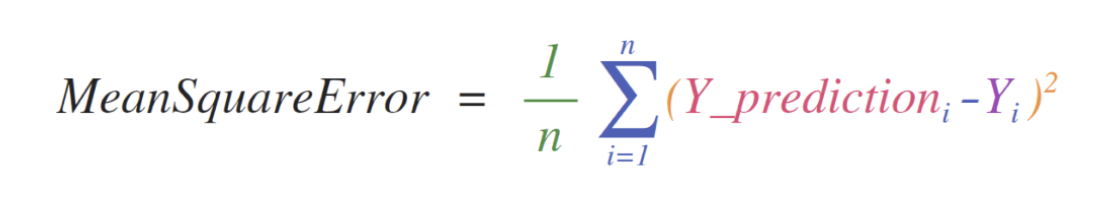

In [111]:
predictions = np.ones(3,dtype=int)
labels = np.arange(1,4)
predictions, labels

(array([1, 1, 1]), array([1, 2, 3]))

In [113]:
mse = np.sum(np.square(predictions - labels)) * (1/3)

In [114]:
mse

1.6666666666666665

## RMSE (Root Mean Square Error)

In [117]:
rmse = np.sqrt(mse)
rmse

1.2909944487358056

## MAE (Mean Absolute Error)

In [120]:
error = predictions - labels
mae = np.mean(np.abs(error))
mae

1.0

## MAPE(Mean Absolute Percentage Error)

In [124]:
# (실제값 - 예측값) / 실제값 의 절댓값에 대한 평균 
np.mean(np.abs((predictions - labels) / labels)) ## 값 작을수록 좋다

0.38888888888888884